In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import urllib
import nltk
import language_tool_python
import string
#nltk.download()
#nltk.download('punkt')
from statistics import mean, stdev
import time
import pandas as pd
import statsmodels.api as sm 
from statsmodels.formula.api import ols

### stats function
def ConvertDictToDataFrame(datadict):
    #data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}    
    X = []
    Y = []
    for key in datadict.keys():
        for ele in datadict[key]:
            X.append(ele)
            Y.append(key)
        
    data = {'X': X, 'group': Y}
    df = pd.DataFrame.from_dict(data)
    return df

def outputIconForStats(pval):
    if pval <= 0.05:
        icon = '*'
    else:
        icon = ' '
    return icon

def ComputeStats_group3(data_dict):
    df = ConvertDictToDataFrame(data_dict)
    #print(df)
    mod = ols('X ~ group', data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    #A one-way ANOVA revealed that there [was or was not] a statistically significant difference in [dependent variable] 
    #between at least two groups (F(between groups df, within groups df) = [F-value], p = [p-value]).
    BetweenGP_df = aov_table.df.group
    WithinGP_df = aov_table.df.Residual
    Fval = aov_table.F.group
    pval = aov_table['PR(>F)'].group
    icon = outputIconForStats(pval)
    displayStats_group3(BetweenGP_df, WithinGP_df, Fval, pval)
    return icon, BetweenGP_df, WithinGP_df, Fval, pval

def displayStats_group3(BetweenGP_df, WithinGP_df, Fval, pval):    
    print("F(" + str(BetweenGP_df) + ", " + str(WithinGP_df) + ") = " + str(Fval) +", p-val=" + str(pval))
    
    
### low level stats function

def count_punctuations(sentence):
    """
    Returns the number of punctuation marks in the given sentence.
    """
    count = 0
    for char in sentence:
        if char in string.punctuation:
            count += 1
    return count

def has_grammar_mistake(sentence):
    """
    Returns True if the sentence contains a grammar mistake, False otherwise.
    """
    tool = language_tool_python.LanguageTool('en-US')
    matches = tool.check(sentence)
    grammarflag = 1
    if len(matches) > 0:
        grammarflag = 1        
    else:
        grammarflag = 0
    return grammarflag

def runQuery(query, start_year=2020, 
             end_year=2022, corpus=26,
             smoothing=0):
  
    # converting a regular string to 
    # the standard URL format
    # eg: "geeks for,geeks" will
    # convert to "geeks%20for%2Cgeeks"
    query = urllib.parse.quote(query)
  
    # creating the URL
    #https://books.google.com/ngrams/json?content=Albert%20Einstein&year_start=1850&year_end=1860&corpus=26&smoothing=0
    url = 'https://books.google.com/ngrams/json?content=' + query + '&year_start=' + str(start_year) + '&year_end=' + str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' + str(smoothing) + ''
    #print(url)
    # requesting data from the above url
    response = requests.get(url)
  
    # extracting the json data from the response we got
    output = response.json()
  
    # creating a list to store the ngram data
    return_data = []
  
    if len(output) == 0:
        # if no data returned from site,
        # print the following statement
        return "No data available for this Ngram."
    else:
        # if data returned from site,
        # store the data in return_data list
        for num in range(len(output)):
            
              # getting the name
            return_data.append((output[num]['ngram'],                                   
                                # getting ngram data
                                output[num]['timeseries']) 
                               )
  
    return return_data


def count_words_with_capital_letters(sentence):
    """
    Returns the number of words in a sentence that contain at least one capital letter.
    """
    count = 0
    words = sentence.split()
    for word in words:
        if any(c.isupper() for c in word):
            count += 1
    return count



def count_word_types(sentence):
    """
    Returns a dictionary containing the word types and the number of words per type in a sentence.
    """
    words = nltk.word_tokenize(sentence)
    tagged_words = nltk.pos_tag(words)
    word_types = {}
    for tagged_word in tagged_words:
        word_type = tagged_word[1]
        if word_type in word_types:
            word_types[word_type] += 1
        else:
            word_types[word_type] = 1
    return word_types


def outputNGRAM_Google(sentence):
    
    count = []
    for char in sentence.split(" "):
        #print(char)
        try:
            ngram = mean(runQuery(char,start_year=2010, end_year=2020, corpus=26, smoothing=0)[0][1])
            time.sleep(1)
            count.append(ngram)
        except:
            print('wrong:')
            print(char)
        
    count = mean(count)
    return count


with open('./Data_all/main_caption_data.json', 'r') as f:
    cap_data = json.load(f)
#print(cap_data)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


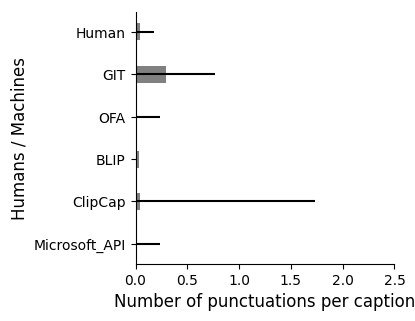

In [2]:
############# number of punctuation
# sentence = "This is a sentence with punctuations! How many? 3."
# print(count_punctuations(sentence))

count = {'human': [],
         'ofa': [], 
         'clipcap': [], 
         'git': [], 
         'microsoft_api': [], 
         'blip': []}

for image, dat in cap_data.items():
    #print(image)
        
    for capp in dat['human']:
        sentence = capp[0]   
        count['human'].append(count_punctuations(sentence))
        
    sentence = dat['machine']['ofa']
    count['ofa'].append(count_punctuations(sentence))
    
    sentence = dat['machine']['clipcap']
    count['clipcap'].append(count_punctuations(sentence))
    sentence = dat['machine']['git']
    count['git'].append(count_punctuations(sentence))
    
    sentence = dat['machine']['microsoft_api']
    count['microsoft_api'].append(count_punctuations(sentence))
    
    sentence = dat['machine']['blip']
    count['blip'].append(count_punctuations(sentence))
    
#save the compiled results as jason
with open("./savedResults/Task1_caption_punctuation.json", "w") as fp:
    json.dump(count,fp) 

years = list(range(1, 7))
# strtask = ['Human', 'ofa', 'git', 'clipcap', 'blip', 'microsoft_api']


strtask = ['Human', 'GIT', 'OFA', 'BLIP', 'ClipCap', 'Microsoft_API']

lengths = [mean(count['human']), mean(count['git']), mean(count['ofa']), 
           mean(count['blip']), mean(count['clipcap']), mean(count['microsoft_api'])]

lengthstd = [stdev(count['human']), stdev(count['git']), stdev(count['ofa']), 
           stdev(count['blip']), stdev(count['clipcap']), stdev(count['microsoft_api'])]

strtask.reverse()
lengths.reverse()

#print(years)
#print(strtask)

# Figure Size
fig, ax = plt.subplots()

#bar chart properties
ax.barh(strtask, lengths, color ='gray', height=0.4, xerr=lengthstd)
  
plt.ylabel('Humans / Machines', fontsize=12)
plt.xlabel('Number of punctuations per caption', fontsize=12)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
plt.xlim(0,2.5)
# plt.ylim(0, 1)
#plt.xlim(0.5, len(years)+0.5)

#draw chance 0.5 
# chancex =np.arange(len(years))
# plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
#plt.legend()
 
fig.tight_layout()

fig.set_figwidth(3.5)
fig.set_figheight(3)

fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
#fig.savefig('./plots/Task1_caption_length.pdf', bbox_inches='tight')
fig.savefig('./plots/Task1_caption_punctuation.eps', format='eps', bbox_inches='tight')
fig.savefig('./plots/Task1_caption_punctuation.png',  bbox_inches='tight')

#print(count)

In [3]:
# ############# number of grammar mistakes
# #sentence = "me"
# #print(has_grammar_mistake(sentence))

# count = {'human': [],
#          'ofa': [], 
#          'clipcap': [], 
#          'git': [], 
#          'microsoft_api': [], 
#          'blip': []}

# for image, dat in cap_data.items():
#     print(image)
        
#     for capp in dat['human']:
#         sentence = capp[0]   
#         count['human'].append(has_grammar_mistake(sentence))
        
#     sentence = dat['machine']['ofa']
#     count['ofa'].append(has_grammar_mistake(sentence))
    
#     sentence = dat['machine']['clipcap']
#     count['clipcap'].append(has_grammar_mistake(sentence))
#     sentence = dat['machine']['git']
#     count['git'].append(has_grammar_mistake(sentence))
    
#     sentence = dat['machine']['microsoft_api']
#     count['microsoft_api'].append(has_grammar_mistake(sentence))
    
#     sentence = dat['machine']['blip']
#     count['blip'].append(has_grammar_mistake(sentence))
    
# #save the compiled results as jason
# with open("./savedResults/Task1_caption_grammar_17.json", "w") as fp:
#     json.dump(count,fp) 

# years = list(range(1, 7))
# # strtask = ['Human', 'ofa', 'git', 'clipcap', 'blip', 'microsoft_api']


# strtask = ['Human', 'GIT', 'OFA', 'BLIP', 'ClipCap', 'Microsoft_API']

# lengths = [mean(count['human']), mean(count['git']), mean(count['ofa']), 
#            mean(count['blip']), mean(count['clipcap']), mean(count['microsoft_api'])]

# lengthstd = [stdev(count['human']), stdev(count['git']), stdev(count['ofa']), 
#            stdev(count['blip']), stdev(count['clipcap']), stdev(count['microsoft_api'])]

# strtask.reverse()
# lengths.reverse()

# #print(years)
# #print(strtask)

# # Figure Size
# fig, ax = plt.subplots()

# #bar chart properties
# ax.barh(strtask, lengths, color ='gray', height=0.4, xerr=lengthstd)
  
# plt.ylabel('Humans / Machines', fontsize=12)
# plt.xlabel('Number of grammar mistakes per caption', fontsize=12)
# plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
# plt.xlim(-5,5)
# # plt.ylim(0, 1)
# #plt.xlim(0.5, len(years)+0.5)

# #draw chance 0.5 
# # chancex =np.arange(len(years))
# # plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
# #plt.legend()
 
# fig.tight_layout()

# fig.set_figwidth(3.5)
# fig.set_figheight(3)

# fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.show()
# #fig.savefig('./plots/Task1_caption_length.pdf', bbox_inches='tight')
# fig.savefig('./plots/Task1_caption_grammar.eps', format='eps', bbox_inches='tight')
# fig.savefig('./plots/Task1_caption_grammar.png',  bbox_inches='tight')



In [4]:
# ############# number of capitalization
# # sentence = "The quick Brown fox JUMPS over the lazy Dog"
# # print(count_words_with_capital_letters(sentence))

# count = {'human': [],
#          'ofa': [], 
#          'clipcap': [], 
#          'git': [], 
#          'microsoft_api': [], 
#          'blip': []}

# for image, dat in cap_data.items():
#     #print(image)
        
#     for capp in dat['human']:
#         sentence = capp[0]   
#         count['human'].append(count_words_with_capital_letters(sentence))
        
#     sentence = dat['machine']['ofa']
#     count['ofa'].append(count_words_with_capital_letters(sentence))
    
#     sentence = dat['machine']['clipcap']
#     count['clipcap'].append(count_words_with_capital_letters(sentence))
#     sentence = dat['machine']['git']
#     count['git'].append(count_words_with_capital_letters(sentence))
    
#     sentence = dat['machine']['microsoft_api']
#     count['microsoft_api'].append(count_words_with_capital_letters(sentence))
    
#     sentence = dat['machine']['blip']
#     count['blip'].append(count_words_with_capital_letters(sentence))
    
# #save the compiled results as jason
# with open("./savedResults/Task1_caption_capitalletter.json", "w") as fp:
#     json.dump(count,fp) 

# years = list(range(1, 7))
# # strtask = ['Human', 'ofa', 'git', 'clipcap', 'blip', 'microsoft_api']


# strtask = ['Human', 'GIT', 'OFA', 'BLIP', 'ClipCap', 'Microsoft_API']

# lengths = [mean(count['human']), mean(count['git']), mean(count['ofa']), 
#            mean(count['blip']), mean(count['clipcap']), mean(count['microsoft_api'])]

# lengthstd = [stdev(count['human']), stdev(count['git']), stdev(count['ofa']), 
#            stdev(count['blip']), stdev(count['clipcap']), stdev(count['microsoft_api'])]

# strtask.reverse()
# lengths.reverse()

# #print(years)
# #print(strtask)

# # Figure Size
# fig, ax = plt.subplots()

# #bar chart properties
# ax.barh(strtask, lengths, color ='gray', height=0.4, xerr=lengthstd)
  
# plt.ylabel('Humans / Machines', fontsize=12)
# plt.xlabel('Number of capital letters per caption', fontsize=12)
# plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
# #plt.xlim(-5,5)
# # plt.ylim(0, 1)
# #plt.xlim(0.5, len(years)+0.5)

# #draw chance 0.5 
# # chancex =np.arange(len(years))
# # plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
# #plt.legend()
 
# fig.tight_layout()

# fig.set_figwidth(3.5)
# fig.set_figheight(3)

# fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# plt.show()
# #fig.savefig('./plots/Task1_caption_length.pdf', bbox_inches='tight')
# fig.savefig('./plots/Task1_caption_capitalletter.eps', format='eps', bbox_inches='tight')
# fig.savefig('./plots/Task1_caption_capitalletter.png',  bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Determiners
[2.0715, 2.052, 2.375, 2.39, 2.506, 1.829]


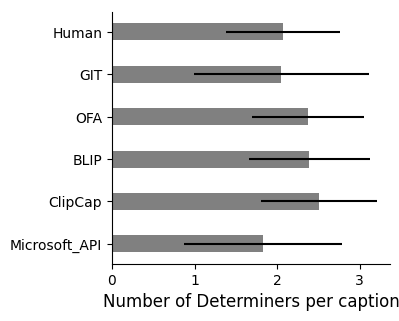

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Adjectives
[0.8745, 0.721, 0.648, 0.732, 0.731, 0.303]


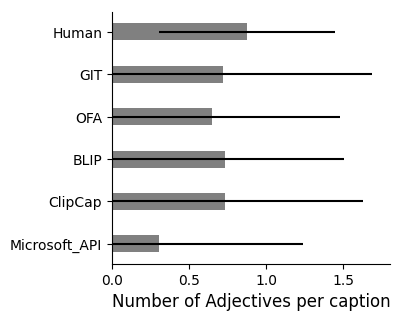

Nouns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[2.9765, 2.776, 2.986, 3.119, 3.081, 2.235]


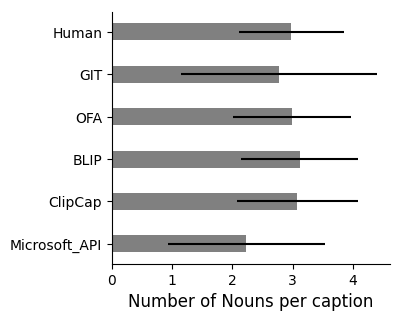

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Adverbs
[0.0605, 0.014, 0.008, 0.006, 0.011, 0]


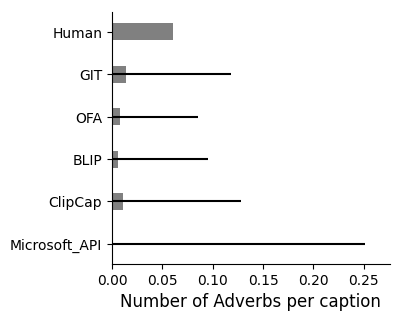

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Verbs
[0.2135, 0.052, 0.094, 0.053, 0.141, 0.017]


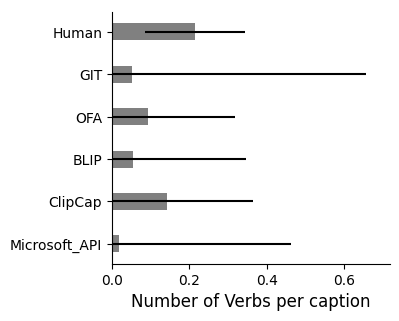

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Prepositions
[1.589, 1.456, 1.74, 1.785, 1.953, 1.089]


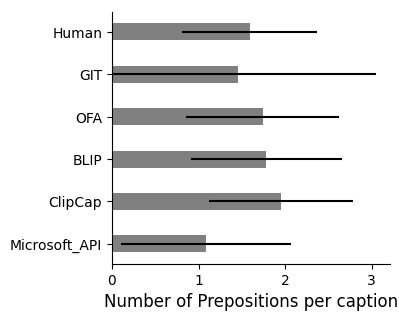

In [5]:
############# number of word types
# 'DT': Determiner - A word that introduces a noun and indicates the reference of it (e.g. "the", "a").
# 'JJ': Adjective - A word that modifies a noun or pronoun by describing, identifying, or quantifying it (e.g. "red", "beautiful").
# 'NN': Noun - A word that represents a person, place, thing, or idea (e.g. "dog", "house").
# 'RB': Adverb - A word that modifies a verb, adjective, or other adverb by providing additional information about time, place, manner, degree, etc. (e.g. "quickly", "very").
# 'VBZ': Verb - A word that expresses an action or state of being in the present tense and agrees with the subject in number and person (e.g. "jumps", "is").
# 'IN': Preposition - A word that shows the relationship between a noun or pronoun and other words in the sentence (e.g. "over", "under").

# sentence = "The quick brown fox quickly jumps over the lazy dog"
# print(count_word_types(sentence))

wordtype = ['DT','JJ','NN','RB','VBZ','IN']
wordtypefullname = ['Determiners','Adjectives','Nouns','Adverbs','Verbs','Prepositions']
#,'NNS','CC','VBP','VBG','VBD','VBN','PRP']

count = {'human': {},
         'ofa': {}, 
         'clipcap': {}, 
         'git': {}, 
         'microsoft_api': {}, 
         'blip': {}}

for key in count:
    for wt in wordtype:
        count[key][wt] = []

for image, dat in cap_data.items():
    #print(image)
        
    for capp in dat['human']:
        sentence = capp[0] 
        dict_word_types = count_word_types(sentence)
        for key in count['human'].keys():
            if key in dict_word_types:
                count['human'][key].append(dict_word_types[key])
            else:
                count['human'][key].append(0)
        
    sentence = dat['machine']['ofa']
    dict_word_types = count_word_types(sentence)
    for key in count['ofa'].keys():
        if key in dict_word_types:
            count['ofa'][key].append(dict_word_types[key])
        else:
            count['ofa'][key].append(0)
    
    sentence = dat['machine']['clipcap']
    dict_word_types = count_word_types(sentence)
    for key in count['clipcap'].keys():
        if key in dict_word_types:
            count['clipcap'][key].append(dict_word_types[key])
        else:
            count['clipcap'][key].append(0)
            
    sentence = dat['machine']['git']
    dict_word_types = count_word_types(sentence)
    for key in count['git'].keys():
        if key in dict_word_types:
            count['git'][key].append(dict_word_types[key])
        else:
            count['git'][key].append(0)
    
    sentence = dat['machine']['microsoft_api']
    dict_word_types = count_word_types(sentence)
    for key in count['microsoft_api'].keys():
        if key in dict_word_types:
            count['microsoft_api'][key].append(dict_word_types[key])
        else:
            count['microsoft_api'][key].append(0)
    
    sentence = dat['machine']['blip']
    dict_word_types = count_word_types(sentence)
    for key in count['blip'].keys():
        if key in dict_word_types:
            count['blip'][key].append(dict_word_types[key])
        else:
            count['blip'][key].append(0)
    
#save the compiled results as jason
with open("./savedResults/Task1_caption_wordtype.json", "w") as fp:
    json.dump(count,fp) 



for i, wtname in enumerate(wordtypefullname):

    years = list(range(1, 7))
    # strtask = ['Human', 'ofa', 'git', 'clipcap', 'blip', 'microsoft_api']

    strtask = ['Human', 'GIT', 'OFA', 'BLIP', 'ClipCap', 'Microsoft_API']
    
    wt = wordtype[i]
    lengths = [mean(count['human'][wt]), mean(count['git'][wt]), mean(count['ofa'][wt]), 
               mean(count['blip'][wt]), mean(count['clipcap'][wt]), mean(count['microsoft_api'][wt])]

    lengthstd = [stdev(count['human'][wt]), stdev(count['git'][wt]), stdev(count['ofa'][wt]), 
               stdev(count['blip'][wt]), stdev(count['clipcap'][wt]), stdev(count['microsoft_api'][wt])]
    
    print(wtname)
    print(lengths)

    strtask.reverse()
    lengths.reverse()

    #print(years)
    #print(strtask)

    # Figure Size
    fig, ax = plt.subplots()

    #bar chart properties
    ax.barh(strtask, lengths, color ='gray', height=0.4, xerr=lengthstd)

    #plt.ylabel('Humans / Machines', fontsize=12)
    plt.xlabel('Number of ' + wtname + ' per caption', fontsize=12)
    plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
    plt.xlim(left=0)
    # plt.ylim(0, 1)
    #plt.xlim(0.5, len(years)+0.5)

    #draw chance 0.5 
    # chancex =np.arange(len(years))
    # plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
    #plt.legend()

    fig.tight_layout()

    fig.set_figwidth(3.5)
    fig.set_figheight(3)

    fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()
    #fig.savefig('./plots/Task1_caption_length.pdf', bbox_inches='tight')
    fig.savefig('./plots/Task1_caption_wordtype_' + wtname + '.eps', format='eps', bbox_inches='tight')
    fig.savefig('./plots/Task1_caption_wordtype_' + wtname + '.png',  bbox_inches='tight')

In [6]:
with open('./savedResults/Task1_caption_punctuation.json', 'r') as f:
        count = json.load(f)

print('Task1_caption_punctuation')
ComputeStats_group3(count)


wordtype = ['DT','JJ','NN','RB','VBZ','IN']
wordtypefullname = ['Determiners','Adjectives','Nouns','Adverbs','Verbs','Prepositions']
strtask = ['human', 'git', 'ofa', 'blip', 'clipcap', 'microsoft_api']
with open("./savedResults/Task1_caption_wordtype.json", "r") as f:
    count = json.load(f)
    
    
for i, wtname in enumerate(wordtypefullname):
    wt = wordtype[i]
    print('Task1_caption_wordtype_' + wtname)
    countWT = {}
    for st in strtask:
        countWT[st] = count[st][wt]
    ComputeStats_group3(countWT)



Task1_caption_punctuation
F(5.0, 6994.0) = 26.18188283931093, p-val=2.719459997959986e-26
Task1_caption_wordtype_Determiners
F(5.0, 6994.0) = 100.17715268811718, p-val=2.42355197565279e-102
Task1_caption_wordtype_Adjectives
F(5.0, 6994.0) = 61.56081879587053, p-val=5.294489376392768e-63
Task1_caption_wordtype_Nouns
F(5.0, 6994.0) = 80.26315771717834, p-val=3.63943900969095e-82
Task1_caption_wordtype_Adverbs
F(5.0, 6994.0) = 34.74684466283317, p-val=3.246460360893326e-35
Task1_caption_wordtype_Verbs
F(5.0, 6994.0) = 55.05491114409974, p-val=2.7259455444319196e-56
Task1_caption_wordtype_Prepositions
F(5.0, 6994.0) = 88.42412509677922, p-val=1.8341855718257803e-90
